In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from obspy.io.segy.segy import _read_segy
import matplotlib.ticker as ticker
from scipy.interpolate import griddata

In [2]:
# Load data
dfs = pd.read_excel('../data/2022_Gravity_Corrected.xlsx', sheet_name=None)
group5_df1 = dfs['GROUP5 CG5-1']
group5_df2 = dfs['GROUP5 CG5-2']
group1_df = dfs['GROUP1 CG5-2']

# Filter out base readings
group5_df1 = group5_df1[group5_df1['Base'] != 'base']
group5_df2 = group5_df2[group5_df2['Base'] != 'base']
group1_df = group1_df[group1_df['Base'] != 'base']

# Combine Group 5 DataFrames
group5_combined = pd.concat([group5_df1, group5_df2], ignore_index=True)

C:\Users\kam98\AppData\Local\Temp\ipykernel_32316\1199860015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_df.loc[:, 'normalized'] = group1_df['Corrected'] - original_min


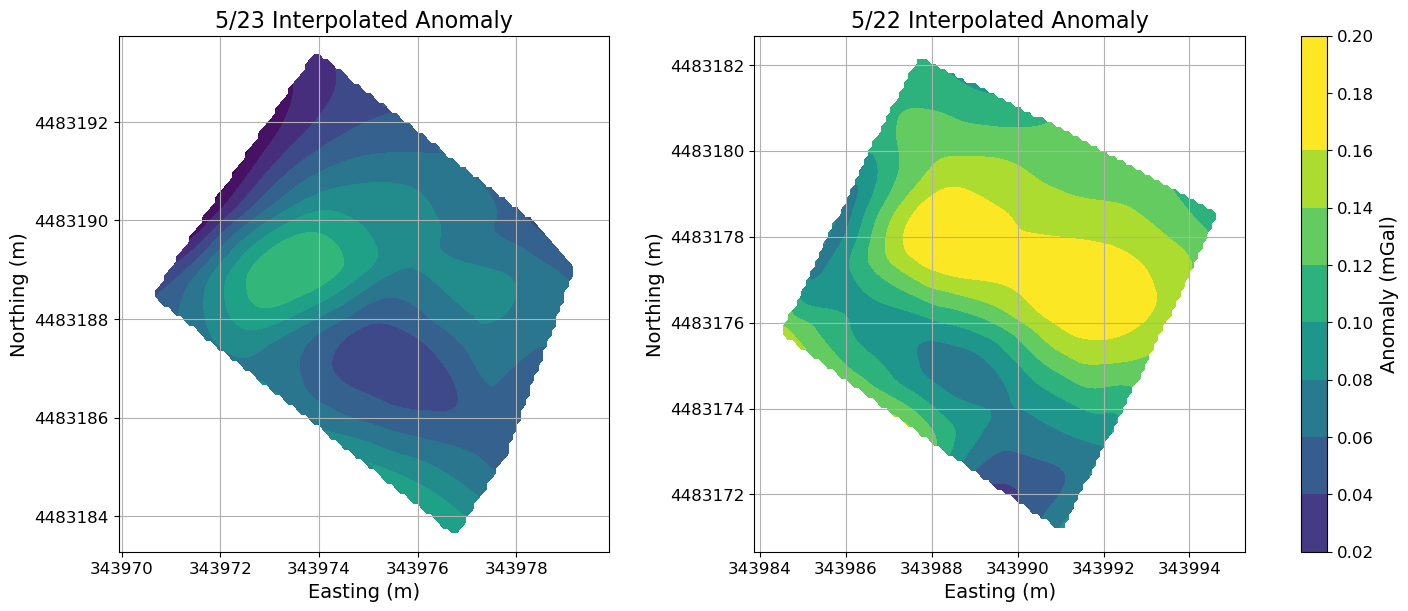

In [3]:
# Compute original global min from both groups
original_min = pd.concat([group1_df['Corrected'], group5_combined['Corrected']]).min()

# Normalize by subtracting the global minimum
group1_df.loc[:, 'normalized'] = group1_df['Corrected'] - original_min
group5_combined.loc[:, 'normalized'] = group5_combined['Corrected'] - original_min

# Set colorbar limits (vmin now 0)
vmin = 0
vmax = pd.concat([group1_df['normalized'], group5_combined['normalized']]).max()

# Plotting settings
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
title_fs = 16
label_fs = 14
tick_fs = 12
cbar_fs = 14

# --- Group 1 (Left Plot) ---
x2 = group1_df['Easting (m)']
y2 = group1_df['Northing (m)']
z2 = group1_df['normalized']
xi2 = np.linspace(x2.min(), x2.max(), 100)
yi2 = np.linspace(y2.min(), y2.max(), 100)
xi2, yi2 = np.meshgrid(xi2, yi2)
zi2 = griddata((x2, y2), z2, (xi2, yi2), method='cubic')

c1 = axs[0].contourf(xi2, yi2, zi2, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title("5/23 Interpolated Anomaly", fontsize=title_fs)
axs[0].set_xlabel("Easting (m)", fontsize=label_fs)
axs[0].set_ylabel("Northing (m)", fontsize=label_fs)
axs[0].tick_params(labelsize=tick_fs)
axs[0].axis('equal')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# --- Group 5 (Right Plot) ---
x1 = group5_combined['Easting (m)']
y1 = group5_combined['Northing (m)']
z1 = group5_combined['normalized']
xi1 = np.linspace(x1.min(), x1.max(), 100)
yi1 = np.linspace(y1.min(), y1.max(), 100)
xi1, yi1 = np.meshgrid(xi1, yi1)
zi1 = griddata((x1, y1), z1, (xi1, yi1), method='cubic')

c2 = axs[1].contourf(xi1, yi1, zi1, levels=8, cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title("5/22 Interpolated Anomaly", fontsize=title_fs)
axs[1].set_xlabel("Easting (m)", fontsize=label_fs)
axs[1].set_ylabel("Northing (m)", fontsize=label_fs)
axs[1].tick_params(labelsize=tick_fs)
axs[1].axis('equal')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}"))
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Shared colorbar
cbar = fig.colorbar(c2, ax=axs, location='right')
cbar.set_label('Anomaly (mGal)', fontsize=cbar_fs)
cbar.ax.tick_params(labelsize=tick_fs)

plt.savefig("../figures/interpolated_grav_anomaly", dpi=300)
plt.show()
